In [1]:
import pandas as pd
import numpy as np
import ast

# 1# Data Insight

<p style="text-align: justify;"> In this part, we will display all the 5 different data bases at disposal. Some features will also be simplified into more efficient structures. Eventually, all the data will be merged into one coherent non-repetitive dataframe. </p>

In [2]:
DATA_PATHWAY = './data/'

## 1.1# Data Import

In [3]:
plot_summaries = pd.read_csv(DATA_PATHWAY + 'plot_summaries.txt', sep='\t', header=None, names=['movie_id', 'plot_summary'])
plot_summaries.head(10)

,movie_id,plot_summary
0,23890098,"Shlykov, a hard-working taxi driver and Lyosha..."
1,31186339,The nation of Panem consists of a wealthy Capi...
2,20663735,Poovalli Induchoodan is sentenced for six yea...
3,2231378,"The Lemon Drop Kid , a New York City swindler,..."
4,595909,Seventh-day Adventist Church pastor Michael Ch...
5,5272176,The president is on his way to give a speech. ...
6,1952976,"{{plot}} The film opens in 1974, as a young gi..."
7,24225279,"The story begins with Hannah, a young Jewish t..."
8,2462689,Infuriated at being told to write one final co...
9,20532852,A line of people drool at the window of the s...


In [4]:
name_clusters = pd.read_csv(DATA_PATHWAY + 'name.clusters.txt', sep='\t', header=None, names=['char_name', 'freebase_char_actor_map_id'])
name_clusters.head(10)

,char_name,freebase_char_actor_map_id
0,Stuart Little,/m/0k3w9c
1,Stuart Little,/m/0k3wcx
2,Stuart Little,/m/0k3wbn
3,John Doe,/m/0jyg35
4,John Doe,/m/0k2_zn
5,Josh Framm,/m/0jt3p3
6,Josh Framm,/m/0jt3t3
7,Caspian X,/m/0646flc
8,Caspian X,/m/02vd12n
9,Apostle Peter,/m/02vd6_v


In [5]:
tvtropes_clusters = pd.read_csv(DATA_PATHWAY + 'tvtropes.clusters.txt', sep='\t', header=None, names=['char_trope', 'attr'])
tvtropes_clusters.head(10)

,char_trope,attr
0,absent_minded_professor,"{""char"": ""Professor Philip Brainard"", ""movie"":..."
1,absent_minded_professor,"{""char"": ""Professor Keenbean"", ""movie"": ""Richi..."
2,absent_minded_professor,"{""char"": ""Dr. Reinhardt Lane"", ""movie"": ""The S..."
3,absent_minded_professor,"{""char"": ""Dr. Harold Medford"", ""movie"": ""Them!..."
4,absent_minded_professor,"{""char"": ""Daniel Jackson"", ""movie"": ""Stargate""..."
5,adventurer_archaeologist,"{""char"": ""Indiana Jones"", ""movie"": ""Indiana Jo..."
6,adventurer_archaeologist,"{""char"": ""Indiana Jones"", ""movie"": ""Indiana Jo..."
7,adventurer_archaeologist,"{""char"": ""Indiana Jones"", ""movie"": ""Indiana Jo..."
8,adventurer_archaeologist,"{""char"": ""Evelyn Carnahan-O'Connell"", ""movie"":..."
9,arrogant_kungfu_guy,"{""char"": ""Han"", ""movie"": ""Enter the Dragon"", ""..."


In [6]:
char_meta_columns = ['movie_id',
                     'freebase_movie_id',
                     'release_date',
                     'char_name',
                     'actor_birth_date',
                     'actor_gender',
                     'actor_height', 
                     'freebase_actor_ethnicity',
                     'actor_name',
                     'actor_age_at_movie_release',
                     'freebase_char_actor_map_id',
                     'freebase_char_id',
                     'freebase_actor_id']

char_metadata = pd.read_csv(DATA_PATHWAY + 'character.metadata.tsv', sep='\t', header=None, names=char_meta_columns)
char_metadata.head(5)

,movie_id,freebase_movie_id,release_date,char_name,actor_birth_date,actor_gender,actor_height,freebase_actor_ethnicity,actor_name,actor_age_at_movie_release,freebase_char_actor_map_id,freebase_char_id,freebase_actor_id
0,975900,/m/03vyhn,2001-08-24,Akooshay,1958-08-26,F,1.620,NaN,Wanda De Jesus,42.0,/m/0bgchxw,/m/0bgcj3x,/m/03wcfv7
1,975900,/m/03vyhn,2001-08-24,Lieutenant Melanie Ballard,1974-08-15,F,1.780,/m/044038p,Natasha Henstridge,27.0,/m/0jys3m,/m/0bgchn4,/m/0346l4
2,975900,/m/03vyhn,2001-08-24,Desolation Williams,1969-06-15,M,1.727,/m/0x67,Ice Cube,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l
3,975900,/m/03vyhn,2001-08-24,Sgt Jericho Butler,1967-09-12,M,1.750,NaN,Jason Statham,33.0,/m/02vchl6,/m/0bgchnq,/m/034hyc
4,975900,/m/03vyhn,2001-08-24,Bashira Kincaid,1977-09-25,F,1.650,NaN,Clea DuVall,23.0,/m/02vbb3r,/m/0bgchp9,/m/01y9xg


In [7]:
movie_meta_columns = ['movie_id',
                    'freebase_movie_id',
                    'movie_name',
                    'release_date',
                    'box_office_revenue',
                    'runtime',
                    'languages',
                    'countries',
                    'genres']

movie_metadata = pd.read_csv(DATA_PATHWAY + 'movie.metadata.tsv', sep='\t', header=None, names=movie_meta_columns)
movie_metadata.head(5)

,movie_id,freebase_movie_id,movie_name,release_date,box_office_revenue,runtime,languages,countries,genres
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp..."
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D..."
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic..."
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}"


## 1.2# Features Simplification

<p style="text-align: justify;"> In this subpart, we will decompose complex features and repetitive informations into simpler additional features for computational efficiency.  </p>

### 1.2.1# Tvtropes_clusters

In [8]:
# Conversion of the dict feature into several columns
clust = tvtropes_clusters.attr.apply(lambda x: pd.Series(ast.literal_eval(x)))
tvtropes_clusters = pd.concat([tvtropes_clusters, clust], axis=1).drop('attr', axis = 1)

# Renaming of the columns
tvtropes_columns = ['char_trope', 
                    'char_name', 
                    'movie_name', 
                    'freebase_char_actor_map_id', 
                    'actor_name']

tvtropes_clusters.columns = tvtropes_columns
tvtropes_clusters.head(5)

,char_trope,char_name,movie_name,freebase_char_actor_map_id,actor_name
0,absent_minded_professor,Professor Philip Brainard,Flubber,/m/0jy9q0,Robin Williams
1,absent_minded_professor,Professor Keenbean,Richie Rich,/m/02vchl3,Michael McShane
2,absent_minded_professor,Dr. Reinhardt Lane,The Shadow,/m/0k6fkc,Ian McKellen
3,absent_minded_professor,Dr. Harold Medford,Them!,/m/0k6_br,Edmund Gwenn
4,absent_minded_professor,Daniel Jackson,Stargate,/m/0k3rhh,James Spader


In [9]:
# Identification of several tropes for one given role
tvtropes_clusters['names'] = tvtropes_clusters.char_name + tvtropes_clusters.movie_name + tvtropes_clusters.actor_name
tvtropes_clusters['names'].is_unique

False

In [10]:
# Extent the non-uniques indexed rows into several columns named like 'char_trope_2'
nb_tropes = tvtropes_clusters.groupby(['names']).cumcount()
m = nb_tropes.astype(bool) * ('_'+(nb_tropes+1).astype(str))
tvtropes_clusters = tvtropes_clusters.set_index(['names', m]).unstack().sort_index(level=1, axis=1).reset_index()
tvtropes_clusters.columns = tvtropes_clusters.columns.map(lambda x: f'{x[0]}{x[1]}')

tvtropes_clusters.head(5)

,names,actor_name,char_name,char_trope,freebase_char_actor_map_id,movie_name,actor_name_2,char_name_2,char_trope_2,freebase_char_actor_map_id_2,...,actor_name_4,char_name_4,char_trope_4,freebase_char_actor_map_id_4,movie_name_4,actor_name_5,char_name_5,char_trope_5,freebase_char_actor_map_id_5,movie_name_5
0,Aaron HallamThe HuntedBenicio del Toro,Benicio del Toro,Aaron Hallam,pupil_turned_to_evil,/m/03ls4jv,The Hunted,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Abel TurnerLakeview TerraceSamuel L. Jackson,Samuel L. Jackson,Abel Turner,dirty_cop,/m/02tb650,Lakeview Terrace,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AbuThe Thief of BagdadSabu Dastagir,Sabu Dastagir,Abu,loveable_rogue,/m/0k6nkk,The Thief of Bagdad,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AchillesTroyBrad Pitt,Brad Pitt,Achilles,byronic_hero,/m/0k7ckp,Troy,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AgathaMinority ReportSamantha Morton,Samantha Morton,Agatha,junkie_prophet,/m/0k0pgt,Minority Report,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
# Keep only relevant repetitive columns i.e. char_trope features
char_tropes = [feature for feature in tvtropes_clusters if feature.startswith('char_trope')]
tvtropes_clusters = tvtropes_clusters[['movie_name', 'char_name', 'actor_name', 'freebase_char_actor_map_id'] + char_tropes]

tvtropes_clusters.rename(columns = {'char_trope':'char_trope_1'}, inplace = True)
tvtropes_clusters.head(5)

,movie_name,char_name,actor_name,freebase_char_actor_map_id,char_trope_1,char_trope_2,char_trope_3,char_trope_4,char_trope_5
0,The Hunted,Aaron Hallam,Benicio del Toro,/m/03ls4jv,pupil_turned_to_evil,NaN,NaN,NaN,NaN
1,Lakeview Terrace,Abel Turner,Samuel L. Jackson,/m/02tb650,dirty_cop,NaN,NaN,NaN,NaN
2,The Thief of Bagdad,Abu,Sabu Dastagir,/m/0k6nkk,loveable_rogue,NaN,NaN,NaN,NaN
3,Troy,Achilles,Brad Pitt,/m/0k7ckp,byronic_hero,NaN,NaN,NaN,NaN
4,Minority Report,Agatha,Samantha Morton,/m/0k0pgt,junkie_prophet,NaN,NaN,NaN,NaN


### 1.2.2# Movie_metadata

In [12]:
# Erase the useless caracters of dict features and convert into lists
def extract_values(s):
    s = s.split(',')
    for i in range(len(s)):
        s[i] = s[i][s[i].find('": "')+len('": "'):]
        s[i] = s[i][:s[i].find('"')]
    s.sort()
    return list(','.join(s).split(","))

# Simplify the displaying of languages, countries and genres
movie_metadata.languages = movie_metadata.languages.apply(extract_values)
movie_metadata.countries = movie_metadata.countries.apply(extract_values)
movie_metadata.genres = movie_metadata.genres.apply(extract_values)

movie_metadata.head(5)

,movie_id,freebase_movie_id,movie_name,release_date,box_office_revenue,runtime,languages,countries,genres
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,[English Language],[United States of America],"[Action, Adventure, Horror, Science Fiction, S..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,[English Language],[United States of America],"[Biographical film, Crime Drama, Drama, Mystery]"
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,[Norwegian Language],[Norway],"[Crime Fiction, Drama]"
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,[English Language],[United Kingdom],"[Erotic thriller, Psychological thriller, Thri..."
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,[German Language],[Germany],[Drama]


In [13]:
# Transform a feature of lists into several features
def extent_list_feature(df, f_name):
    
    # Generate the names of the new extented columns like 'f_name_1' 
    column_names = []
    for i in range(1, df[f_name].str.len().max()+1):
        column_names = np.append(column_names, f_name + '_' + str(i))
        
    # Extent the list column into several columns
    extended_columns = pd.DataFrame(df[f_name].to_list(), columns=column_names)
    
    # Add the new extended columns to the initial dataframe
    df = pd.concat([df, extended_columns], axis=1).drop(f_name, axis = 1)
        
    return df

movie_metadata = extent_list_feature(movie_metadata, 'languages')
movie_metadata = extent_list_feature(movie_metadata, 'countries')
movie_metadata = extent_list_feature(movie_metadata, 'genres')

movie_metadata.head(5)

,movie_id,freebase_movie_id,movie_name,release_date,box_office_revenue,runtime,languages_1,languages_2,languages_3,languages_4,...,genres_8,genres_9,genres_10,genres_11,genres_12,genres_13,genres_14,genres_15,genres_16,genres_17
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,English Language,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,English Language,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,Norwegian Language,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,English Language,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,German Language,None,None,None,...,None,None,None,None,None,None,None,None,None,None


## 1.3# Data Merging ##

### 1.3.1# Data relative to the movies only

In [14]:
# We prevent plot summaries without any other metadata
movie_data = movie_metadata.merge(plot_summaries, how='left')
movie_data.head(5)

,movie_id,freebase_movie_id,movie_name,release_date,box_office_revenue,runtime,languages_1,languages_2,languages_3,languages_4,...,genres_9,genres_10,genres_11,genres_12,genres_13,genres_14,genres_15,genres_16,genres_17,plot_summary
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,English Language,None,None,None,...,None,None,None,None,None,None,None,None,None,"Set in the second half of the 22nd century, th..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,English Language,None,None,None,...,None,None,None,None,None,None,None,None,None,NaN
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,Norwegian Language,None,None,None,...,None,None,None,None,None,None,None,None,None,NaN
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,English Language,None,None,None,...,None,None,None,None,None,None,None,None,None,A series of murders of rich young women throug...
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,German Language,None,None,None,...,None,None,None,None,None,None,None,None,None,"Eva, an upper class housewife, becomes frustra..."


### 1.3.2# Data relative to the characters

In [15]:
def merge_uncomplete_features(main_df, df, merging_feature, how_='left'):
    """ Enrich the NaN values of main_df features, if possible, by merging with df.
    
    Args:
        main_df (pd.DataFrame): dataframe whose NaN values will be replaced if possible on some common features
        df (pd.DataFrame): dataframe that complete NaN values of main_df
        merging_feature (pd.Series): common feature between main_df and df that will permit the merge between the two
        how_  (str): how argument of the merge
        
    Return:
        df_merge (pd.DataFrame): updated version of main_df
    """
    
    # Merge on the merging feature + extent common features in 2 columns such as 'movie_name' and 'movie_name_copy'
    df_merge = pd.merge(main_df, df.set_index(merging_feature), how=how_, right_index=True, left_on=merging_feature, suffixes=['', '_copy'])
    
    # Common features between main_df and df
    common_features = np.array(main_df.columns.intersection(df.set_index(merging_feature).columns))
    
    # Invert the Nan value of the initial main_df feature with its version in df, then drop the copied feature
    for ind, feature in enumerate(common_features):
        df_merge.loc[df_merge[feature].isnull(), [feature, feature + '_copy']] = df_merge.loc[df_merge[feature].isnull(), [feature + '_copy', feature]].values
        df_merge = df_merge.drop(feature + '_copy', axis=1)
    
    return df_merge

In [16]:
# Enrich the NaN values within the char_name feature of char_metadata with names_clusters if possible. 
char_data = merge_uncomplete_features(char_metadata, name_clusters, 'freebase_char_actor_map_id')
char_data = char_data[~char_data.index.duplicated()]
char_data.head(5)

,movie_id,freebase_movie_id,release_date,char_name,actor_birth_date,actor_gender,actor_height,freebase_actor_ethnicity,actor_name,actor_age_at_movie_release,freebase_char_actor_map_id,freebase_char_id,freebase_actor_id
0,975900,/m/03vyhn,2001-08-24,Akooshay,1958-08-26,F,1.620,NaN,Wanda De Jesus,42.0,/m/0bgchxw,/m/0bgcj3x,/m/03wcfv7
1,975900,/m/03vyhn,2001-08-24,Lieutenant Melanie Ballard,1974-08-15,F,1.780,/m/044038p,Natasha Henstridge,27.0,/m/0jys3m,/m/0bgchn4,/m/0346l4
2,975900,/m/03vyhn,2001-08-24,Desolation Williams,1969-06-15,M,1.727,/m/0x67,Ice Cube,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l
3,975900,/m/03vyhn,2001-08-24,Sgt Jericho Butler,1967-09-12,M,1.750,NaN,Jason Statham,33.0,/m/02vchl6,/m/0bgchnq,/m/034hyc
4,975900,/m/03vyhn,2001-08-24,Bashira Kincaid,1977-09-25,F,1.650,NaN,Clea DuVall,23.0,/m/02vbb3r,/m/0bgchp9,/m/01y9xg


In [17]:
# Enrich the NaN values within numerous features of char_metadata with tvtropes_clusters if possible + add char_tropes features
char_data = merge_uncomplete_features(char_data, tvtropes_clusters, 'freebase_char_actor_map_id')
char_data.head(5)

,movie_id,freebase_movie_id,release_date,char_name,actor_birth_date,actor_gender,actor_height,freebase_actor_ethnicity,actor_name,actor_age_at_movie_release,freebase_char_actor_map_id,freebase_char_id,freebase_actor_id,movie_name,char_trope_1,char_trope_2,char_trope_3,char_trope_4,char_trope_5
0,975900,/m/03vyhn,2001-08-24,Akooshay,1958-08-26,F,1.620,NaN,Wanda De Jesus,42.0,/m/0bgchxw,/m/0bgcj3x,/m/03wcfv7,NaN,NaN,NaN,NaN,NaN,NaN
1,975900,/m/03vyhn,2001-08-24,Lieutenant Melanie Ballard,1974-08-15,F,1.780,/m/044038p,Natasha Henstridge,27.0,/m/0jys3m,/m/0bgchn4,/m/0346l4,NaN,NaN,NaN,NaN,NaN,NaN
2,975900,/m/03vyhn,2001-08-24,Desolation Williams,1969-06-15,M,1.727,/m/0x67,Ice Cube,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l,NaN,NaN,NaN,NaN,NaN,NaN
3,975900,/m/03vyhn,2001-08-24,Sgt Jericho Butler,1967-09-12,M,1.750,NaN,Jason Statham,33.0,/m/02vchl6,/m/0bgchnq,/m/034hyc,NaN,NaN,NaN,NaN,NaN,NaN
4,975900,/m/03vyhn,2001-08-24,Bashira Kincaid,1977-09-25,F,1.650,NaN,Clea DuVall,23.0,/m/02vbb3r,/m/0bgchp9,/m/01y9xg,NaN,NaN,NaN,NaN,NaN,NaN


____

____
<h3 style = "color:gold;">GENERAL MERGE</h3>

So instead of merging character data with movie data we extract features from the character data and merge it with the movie data

In [18]:
#char_data.value

In [19]:
gender_presence = char_data.groupby('movie_id')['actor_gender'].value_counts(normalize = True).unstack()
gender_presence.columns = [f"{x}_gender_porportion" for x in gender_presence.columns.tolist()]
gender_presence.fillna(0, inplace = True)
gender_presence.head()

,F_gender_porportion,M_gender_porportion
movie_id,,
330,1.000000,0.000000
3217,0.230769,0.769231
3333,0.428571,0.571429
3746,0.214286,0.785714
3837,0.100000,0.900000


In [20]:
gender_merged = pd.merge(movie_data, gender_presence, left_index= True, right_index = True)
gender_merged.head()[gender_presence.columns]
gender_merged

,movie_id,freebase_movie_id,movie_name,release_date,box_office_revenue,runtime,languages_1,languages_2,languages_3,languages_4,...,genres_11,genres_12,genres_13,genres_14,genres_15,genres_16,genres_17,plot_summary,F_gender_porportion,M_gender_porportion
330,240088,/m/01jtxq,In Living Color,NaN,NaN,NaN,,None,None,None,...,None,None,None,None,None,None,None,NaN,1.000000,0.000000
3217,21450642,/m/05f4_dp,Anti-Clock,NaN,NaN,NaN,,None,None,None,...,None,None,None,None,None,None,None,NaN,0.230769,0.769231
3333,29029252,/m/0dgqrln,Tansy,1921,NaN,NaN,English Language,None,None,None,...,None,None,None,None,None,None,None,"George Firle is a shepherd, helped in his wor...",0.428571,0.571429
3746,31025059,/m/0gg92c0,El anónimo,1933,NaN,NaN,Spanish Language,None,None,None,...,None,None,None,None,None,None,None,"A drama based on the life of a Doctor , who le...",0.214286,0.785714
3837,15493185,/m/03mc2bj,Hooked on You,2007,NaN,97.0,Cantonese,English Language,Standard Mandarin,None,...,None,None,None,None,None,None,None,"Miu, a fishmonger at the Prosperity Market. Be...",0.100000,0.900000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80916,1688639,/m/0bwhfgl,They're a Weird Mob,1966,2000000.0,112.0,English Language,None,None,None,...,None,None,None,None,None,None,None,"Nino Culotta is an Italian immigrant, newly ar...",0.066667,0.933333
80923,3204162,/m/08z2qq,Screaming Masterpiece,2005,NaN,87.0,English Language,Icelandic Language,None,None,...,None,None,None,None,None,None,None,NaN,0.636364,0.363636
80944,8267640,/m/026ydx7,King of the Texas Rangers,1941,NaN,215.0,English Language,None,None,None,...,None,None,None,None,None,None,None,When Tom King's Texas Ranger father is shot de...,0.307692,0.692308
81100,19760243,/m/04q7ndk,Candy Goes to Hollywood,NaN,NaN,NaN,,None,None,None,...,None,None,None,None,None,None,None,NaN,0.166667,0.833333


In [22]:
lexical_data = pd.read_csv(DATA_PATHWAY + 'plot_lexicon.csv', sep=',').drop(labels=['plot_summary'], axis=1)
merged_data = pd.merge(gender_merged, lexical_data, left_on='movie_id', right_on='movie_id')
merged_data['pn'] = merged_data['positive_count']/(merged_data['positive_count']+merged_data['negative_count'])

merged_data

,movie_id,freebase_movie_id,movie_name,release_date,box_office_revenue,runtime,languages_1,languages_2,languages_3,languages_4,...,genres_14,genres_15,genres_16,genres_17,plot_summary,F_gender_porportion,M_gender_porportion,positive_count,negative_count,pn
0,29029252,/m/0dgqrln,Tansy,1921,NaN,NaN,English Language,None,None,None,...,None,None,None,None,"George Firle is a shepherd, helped in his wor...",0.428571,0.571429,16,39,0.290909
1,31025059,/m/0gg92c0,El anónimo,1933,NaN,NaN,Spanish Language,None,None,None,...,None,None,None,None,"A drama based on the life of a Doctor , who le...",0.214286,0.785714,2,0,1.000000
2,15493185,/m/03mc2bj,Hooked on You,2007,NaN,97.0,Cantonese,English Language,Standard Mandarin,None,...,None,None,None,None,"Miu, a fishmonger at the Prosperity Market. Be...",0.100000,0.900000,5,8,0.384615
3,26792675,/m/0ch11_w,Degrassi Takes Manhattan,NaN,NaN,NaN,,None,None,None,...,None,None,None,None,The film begins with the members of Janie & th...,0.100000,0.900000,15,49,0.234375
4,23001766,/m/064k7m9,Oru Pennum Randaanum,2008,NaN,115.0,Malayalam Language,None,None,None,...,None,None,None,None,"The four chapters of the film tell stories, wh...",0.437500,0.562500,16,62,0.205128
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300,26267121,/m/0b74yg0,Monga,2010-02-05,NaN,141.0,Mandarin Chinese,Min Nan,Standard Mandarin,Taiwanese,...,None,None,None,None,Monga is one of Taipei's districts. Mosquito ...,0.111111,0.888889,8,32,0.200000
301,18363573,/m/04f3sgp,Lalkaar,NaN,NaN,NaN,Hindi Language,None,None,None,...,None,None,None,None,"Two battle hardened brothers, one in the Royal...",0.545455,0.454545,2,6,0.250000
302,10933656,/m/02qvfbr,The Leg Fighters,1980,NaN,92.0,Cantonese,None,None,None,...,None,None,None,None,Phoenix is the prodigal daughter of sorts with...,0.500000,0.500000,8,22,0.266667
303,1688639,/m/0bwhfgl,They're a Weird Mob,1966,2000000.0,112.0,English Language,None,None,None,...,None,None,None,None,"Nino Culotta is an Italian immigrant, newly ar...",0.066667,0.933333,7,22,0.241379


<AxesSubplot:xlabel='pn', ylabel='Count'>

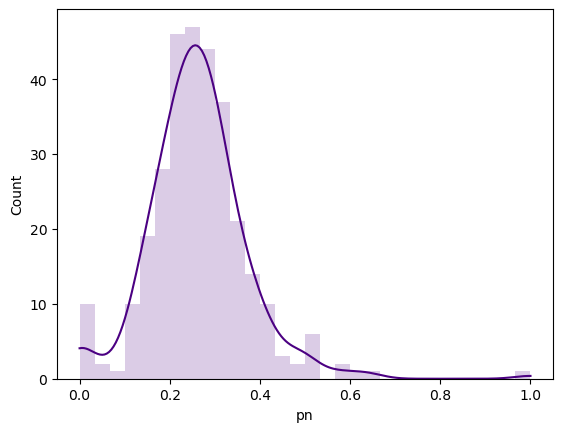

In [25]:
import seaborn as sns

sns.histplot(merged_data['pn'], kde=True, alpha=0.2,linewidth=0, color = 'indigo')